In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import string
from nltk.corpus import stopwords

## Data

In [20]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [24]:
# Drop unnecessary columns, Rename column names to something meaningful
df_drop_null = df[['v1', 'v2']]
df_rename = df_drop_null.rename(columns={'v1': 'tag', 'v2': 'message'})

In [25]:
df_rename.describe()

,tag,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
# Remove duplicate data
df_no_dup = df_rename.drop_duplicates()
df_no_dup.describe()

,tag,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


## Visualizations

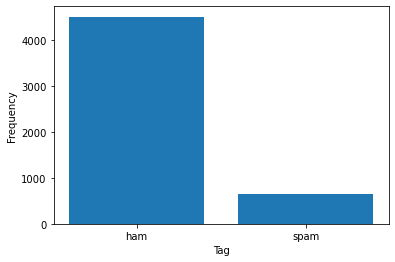

In [84]:
# Ham vs Spam frequency
plt.bar(['ham', 'spam'], df_no_dup['tag'].value_counts())
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

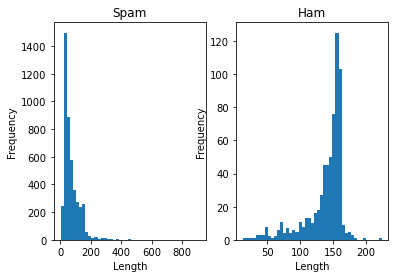

In [83]:
# Ham vs Spam Length
df_ham = df_no_dup[df_no_dup['tag'] == 'ham']
df_spam = df_no_dup[df_no_dup['tag'] == 'spam']
fig, axs = plt.subplots(1, 2)
axs[0].hist(df_ham['message'].apply(len), bins = 45)
axs[0].set_title('Spam')
axs[0].set_xlabel('Length')
axs[0].set_ylabel('Frequency')
axs[1].hist(df_spam['message'].apply(len), bins = 45)
axs[1].set_title('Ham')
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Frequency')